# Dataset Processing
Creates the CSV file for use in machine learning from OSD datasets

In [130]:
%%capture
!pip install import_ipynb --no-cache
import import_ipynb
m = __import__("Methods")

In [131]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import boxcox

In [132]:
data = dict()
meta = dict()

In [133]:
def read_meta_data(dataset):
  url = 'https://osdr.nasa.gov/geode-py/ws/studies/OSD-' + str(dataset) + '/download?source=datamanager&file=OSD-' + dataset + '_metadata_OSD-' + dataset + '-ISA.zip'
  filename = dataset + '-meta.zip'
  urlretrieve(url, filename)
  !unzip -o {filename} > /dev/null
  df = pd.read_csv('s_OSD-' + dataset + '.txt', sep='\t', header=0)
  return df

In [134]:
meta["RNA-SEQ"] = read_meta_data('514')
meta["IHC"] = read_meta_data('592')

In [135]:
meta["IHC"]

,Source Name,Sample Name,Comment[Set],Characteristics[Organism],Term Source REF,Term Accession Number,Characteristics[Strain],Term Source REF.1,Term Accession Number.1,Characteristics[Strain Source],Characteristics[Genotype],Term Source REF.2,Term Accession Number.2,Characteristics[Material Type],Term Source REF.3,Term Accession Number.3,Characteristics[Generation],Characteristics[age],Unit,Term Source REF.4,Term Accession Number.4,Factor Value[Altered Gravity],Factor Value[Sex],Term Source REF.5,Term Accession Number.5,Factor Value[Spaceflight],Term Source REF.6,Term Accession Number.6,Protocol REF,Parameter Value[habitat],Parameter Value[light cycle],Parameter Value[light source],Parameter Value[Age of F0 at Launch],Unit.1,Term Source REF.7,Term Accession Number.7,Parameter Value[duration],Unit.2,Term Source REF.8,Term Accession Number.8,Protocol REF.1,Parameter Value[Sample Preservation Method],Term Source REF.9,Term Accession Number.9,Parameter Value[Sample Storage Temperature],Unit.3,Term Source REF.10,Term Accession Number.10
0,R0_Earth_F1,R0_Earth_F1,1,Drosophila melanogaster,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,W1118,OSD,https://osdr.nasa.gov/,Bloomington Stock Center,Wild Type,OSD,https://osdr.nasa.gov/,brain,RBO,http://purl.obolibrary.org/obo/UBERON_0000955,F1 Generation,8-17,day,UO,http://purl.obolibrary.org/obo/UO_0000033,1G,female,EFO,http://purl.obolibrary.org/obo/PATO_0000383,Ground Control,OSD,https://osdr.nasa.gov/,Treatment Protocol,MVP hardware,12h Light:12h Dark,white LED illumination,54,hour,UO,http://purl.obolibrary.org/obo/UO_0000032,29,day,UO,http://purl.obolibrary.org/obo/UO_0000033,sample collection,fixation in 4% paraformaldehyde then stored in...,OSD,https://osdr.nasa.gov/,4,degree Celsius,UO,http://purl.obolibrary.org/obo/UO_0000027
1,R0_Earth_F2,R0_Earth_F2,1,Drosophila melanogaster,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,W1118,OSD,https://osdr.nasa.gov/,Bloomington Stock Center,Wild Type,OSD,https://osdr.nasa.gov/,brain,RBO,http://purl.obolibrary.org/obo/UBERON_0000955,F1 Generation,8-17,day,UO,http://purl.obolibrary.org/obo/UO_0000033,1G,female,EFO,http://purl.obolibrary.org/obo/PATO_0000383,Ground Control,OSD,https://osdr.nasa.gov/,Treatment Protocol,MVP hardware,12h Light:12h Dark,white LED illumination,54,hour,UO,http://purl.obolibrary.org/obo/UO_0000032,29,day,UO,http://purl.obolibrary.org/obo/UO_0000033,sample collection,fixation in 4% paraformaldehyde then stored in...,OSD,https://osdr.nasa.gov/,4,degree Celsius,UO,http://purl.obolibrary.org/obo/UO_0000027
2,R0_Earth_F3,R0_Earth_F3,1,Drosophila melanogaster,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,W1118,OSD,https://osdr.nasa.gov/,Bloomington Stock Center,Wild Type,OSD,https://osdr.nasa.gov/,brain,RBO,http://purl.obolibrary.org/obo/UBERON_0000955,F1 Generation,8-17,day,UO,http://purl.obolibrary.org/obo/UO_0000033,1G,female,EFO,http://purl.obolibrary.org/obo/PATO_0000383,Ground Control,OSD,https://osdr.nasa.gov/,Treatment Protocol,MVP hardware,12h Light:12h Dark,white LED illumination,54,hour,UO,http://purl.obolibrary.org/obo/UO_0000032,29,day,UO,http://purl.obolibrary.org/obo/UO_0000033,sample collection,fixation in 4% paraformaldehyde then stored in...,OSD,https://osdr.nasa.gov/,4,degree Celsius,UO,http://purl.obolibrary.org/obo/UO_0000027
3,R0_Earth_F4,R0_Earth_F4,1,Drosophila melanogaster,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,W1118,OSD,https://osdr.nasa.gov/,Bloomington Stock Center,Wild Type,OSD,https://osdr.nasa.gov/,brain,RBO,http://purl.obolibrary.org/obo/UBERON_0000955,F1 Generation,8-17,day,UO,http://purl.obolibrary.org/obo/UO_0000033,1G,female,EFO,http://purl.obolibrary.org/obo/PATO_0000383,Ground Control,OSD,https://osdr.nasa.gov/,Treatment Protocol,MVP hardware,12h Light:12h Dark,white LED illumination,54,hour,UO,http://purl.obolibrary.org/obo/UO_0000032,29,day,UO,http://purl.obolibrary.org/obo/UO_0000033,sample collection,fixation in 4% paraform

In [136]:
meta["RNA-SEQ"]

,Source Name,Sample Name,Characteristics[Organism],Term Source REF,Term Accession Number,Characteristics[Strain],Term Source REF.1,Term Accession Number.1,Characteristics[Strain Source],Characteristics[Genotype],Term Source REF.2,Term Accession Number.2,Characteristics[Material Type],Term Source REF.3,Term Accession Number.3,Factor Value[Sex],Term Source REF.4,Term Accession Number.4,Characteristics[Generation],Characteristics[age],Unit,Term Source REF.5,Term Accession Number.5,Factor Value[Spaceflight],Term Source REF.6,Term Accession Number.6,Factor Value[Altered Gravity],Protocol REF,Parameter Value[habitat],Parameter Value[Age of F0 at Launch],Unit.1,Term Source REF.7,Term Accession Number.7,Parameter Value[Light Cycle],Parameter Value[light source],Protocol REF.1,Parameter Value[Sample Preservation Method],Term Source REF.8,Term Accession Number.8,Parameter Value[Sample Storage Temperature],Unit.2,Term Source REF.9,Term Accession Number.9,Comment[Experiment Start Date (DD/MM/YYYY)],Comment[Experiment End Date (DD/MM/YYYY)]
0,Earth Male 1,Earth M1,Drosophila melanogaster,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,W1118,GLDS,https://genelab-data.ndc.nasa.gov/,Bloomington Stock Center,Wild Type,NCIT,http://purl.obolibrary.org/obo/NCIT_C62195,head,RBO,http://purl.obolibrary.org/obo/UBERON_0000033,male,EFO,http://purl.obolibrary.org/obo/PATO_0000384,F1 generation,around 6 to 12,day,UO,http://purl.obolibrary.org/obo/UO_0000033,Ground Control,GLDS,https://genelab-data.ndc.nasa.gov/,1G,treatment protocol,MVP hardware,54,hour,UO,http://purl.obolibrary.org/obo/UO_0000032,12h Light:12h Dark,white LED illumination,sample collection,RNALater,NCIT,http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus...,-80,degree Celsius,UO,http://purl.obolibrary.org/obo/UO_0000027,03/04/2018,01/05/2018
1,Earth Male 2,Earth M2,Drosophila melanogaster,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,W1118,GLDS,https://genelab-data.ndc.nasa.gov/,Bloomington Stock Center,Wild Type,NCIT,http://purl.obolibrary.org/obo/NCIT_C62195,head,RBO,http://purl.obolibrary.org/obo/UBERON_0000033,male,EFO,http://purl.obolibrary.org/obo/PATO_0000384,F1 generation,around 6 to 12,day,UO,http://purl.obolibrary.org/obo/UO_0000033,Ground Control,GLDS,https://genelab-data.ndc.nasa.gov/,1G,treatment protocol,MVP hardware,54,hour,UO,http://purl.obolibrary.org/obo/UO_0000032,12h Light:12h Dark,white LED illumination,sample collection,RNALater,NCIT,http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus...,-80,degree Celsius,UO,http://purl.obolibrary.org/obo/UO_0000027,03/04/2018,01/05/2018
2,Earth Male 3,Earth M3,Drosophila melanogaster,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,W1118,GLDS,https://genelab-data.ndc.nasa.gov/,Bloomington Stock Center,Wild Type,NCIT,http://purl.obolibrary.org/obo/NCIT_C62195,head,RBO,http://purl.obolibrary.org/obo/UBERON_0000033,male,EFO,http://purl.obolibrary.org/obo/PATO_0000384,F1 generation,around 6 to 12,day,UO,http://purl.obolibrary.org/obo/UO_0000033,Ground Control,GLDS,https://genelab-data.ndc.nasa.gov/,1G,treatment protocol,MVP hardware,54,hour,UO,http://purl.obolibrary.org/obo/UO_0000032,12h Light:12h Dark,white LED illumination,sample collection,RNALater,NCIT,http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus...,-80,degree Celsius,UO,http://purl.obolibrary.org/obo/UO_0000027,03/04/2018,01/05/2018
3,Earth Male 4,Earth M4,Drosophila melanogaster,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,W1118,GLDS,https://genelab-data.ndc.nasa.gov/,Bloomington Stock Center,Wild Type,NCIT,http://purl.obolibrary.org/obo/NCIT_C62195,head,RBO,http://purl.obolibrary.org/obo/UBERON_0000033,male,EFO,http://purl.obolibrary.org/obo/PATO_0000384,F1 generation,around 6 to 12,day,UO,http://purl.obolibrary.org/obo/UO_0000033,Ground Control,GLDS,https://genelab-data.ndc.nasa.gov/,1G,treatment protocol,MVP hardware,54,hour,UO,http://purl.obolibrary.org/obo/UO_0000032,12h Light:12h Dark,white LED illumination,sample collection,RN

In [137]:
data["RNA-SEQ"] = pd.read_csv("./data/osd/GLDS-514_rna_seq_Normalized_Counts_GLbulkRNAseq.csv")
data["IHC"] = pd.read_csv("./data/osd/LSDS-31_IHC_LSDS-31_IHC_LSDS-31_Immunohistochemistry_mhatreTRANSFORMED.csv")

In [138]:
drop_cols = data["IHC"].columns[4:data["IHC"].columns.size].tolist()
drop_cols.append("alsda_id")

In [139]:
def fill_na_with_group_avg(df):
    # Extract the group from the 'source_name' column
    df['group'] = df['source_name'].apply(lambda x: x.split('_')[0])
    
    # For each column that needs NaN values filled
    for col in ['th_positive_cells', 'repo_glial_cells']:
        # Calculate the group average for each group
        group_avg = df.groupby('group')[col].transform('mean')
        
        # Fill NaN values with the group average
        df[col] = df[col].fillna(group_avg)
    
    # Drop the temporary 'group' column
    df.drop(columns=['group'], inplace=True)

In [140]:
cols = data["IHC"].columns[2:data["IHC"].columns.size]

# drop unnecessary columns
data["IHC"].drop(columns=drop_cols, inplace=True)

# rename source
data["IHC"]["source_name"] = data["IHC"]["source_name"].str[3:]

# remove post return datavalues
data["IHC"] = data["IHC"][~data["IHC"]['source_name'].str.contains('25')].copy()

fill_na_with_group_avg(data["IHC"])

# # remove duplicates
data["IHC"] = data["IHC"].drop_duplicates(subset='source_name', keep='first').copy()

data["IHC"]

,source_name,th_positive_cells,repo_glial_cells
0,Earth_F1,101.000000,429.714286
1,Earth_F2,103.000000,401.000000
2,Earth_F3,86.000000,351.000000
3,Earth_F4,101.000000,515.000000
4,Earth_F5,98.000000,429.714286
5,Earth_F6,110.000000,351.000000
6,Earth_F7,115.000000,397.000000
7,Earth_F8,97.000000,550.000000
8,Earth_F9,102.000000,295.000000
9,Earth_M1,85.000000,456.000000


# RNA-Seq Dataset Description
- FBgn... (FlyBase Genes)
  - [FlybBase](http://flybase.org/) is the primary repository of genetic and molecular data of the insect family Drosophilidae
- RR..._transposable_element
  - Supposedly from FB as well

In [141]:
data["RNA-SEQ"].head(data["RNA-SEQ"].size)

,Unnamed: 0,Earth_M1,Earth_M2,Earth_M3,Earth_M4,Earth_F1,Earth_F2,Earth_F3,Earth_F4,SFug_M1,SFug_M2,SFug_M3,SFug_M4,SFug_F1,SFug_F2,SFug_F3,SFug_F4,SF1g_M1,SF1g_M2,SF1g_M3,SF1g_M4,SF1g_F1,SF1g_F2,SF1g_F3,SF1g_F4
0,FBgn0000003,268.326940,289.610821,307.904018,767.736468,363.014096,223.520592,237.296136,434.895552,617.512755,397.275093,494.114191,102.733961,540.691165,1227.123863,905.229891,414.117771,1487.063462,1557.208531,1377.858569,1120.621546,234.505650,395.502182,350.925252,450.650643
1,FBgn0000008,1211.805611,1163.875378,1055.794866,1091.560477,1066.283531,1169.359160,986.334465,1181.038372,1340.080214,1189.849152,1132.596904,1302.634134,972.791161,1163.510890,1248.041362,1258.849049,1173.876133,1119.218149,1097.009587,1118.483285,1319.362577,1321.783049,1167.903969,1464.003454
2,FBgn0000014,3.721252,6.748211,6.457626,0.000000,0.810243,4.260959,2.195389,2.844821,4.401245,6.346743,1.979916,0.000000,0.000000,3.030498,0.000000,0.000000,5.328744,0.000000,14.785793,3.172961,6.647281,0.000000,1.016876,2.664084
3,FBgn0000015,0.000000,1.572493,9.666983,1.898347,14.056209,2.461707,13.225248,7.404185,7.305775,5.718576,3.049767,2.560166,2.050603,4.914730,4.797240,9.462406,1.212701,2.167621,3.200357,3.612382,5.795728,2.208960,16.095113,27.152112
4,FBgn0000017,5792.651152,6025.273956,5669.638583,5646.796932,4716.378972,4988.898115,5071.258761,5147.098499,6702.973198,5317.186322,6582.326137,7718.806957,4004.071358,4965.857566,5206.478374,6145.212985,5983.464767,5956.888079,5813.034554,6157.063014,5643.030168,6117.758433,5151.717030,5756.307903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16670,RR51007_transposable_element,509.601736,666.527630,526.283078,599.806296,1756.944820,1187.817505,958.243298,1092.694204,893.252793,1337.368491,1276.860919,1264.340096,2573.488747,1830.530951,2445.944358,2307.839620,916.500071,574.561196,650.926226,600.877625,959.500452,917.583120,1840.085761,1383.760349
16671,RR51048_transposable_element,0.000000,0.000000,4.138006,0.000000,0.000000,0.000000,0.000000,0.845202,1.121934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.928045,0.000000,0.000000,4.043984,0.000000,0.000000,0.000000,0.773629
16672,RR51093_transposable_element,241.838826,137.937182,0.000000,47.196831,56.801274,231.254518,267.554499,0.000000,11.222187,0.000000,0.000000,40.612327,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.521423,87.510941,17.216557,83.533404
16673,RR51475_transposable_element,219.591935,189.546519,256.521685,307.164944,331.171984,214.531486,319.041196,388.738942,230.046175,233.036031,388.234729,469.276630,227.867665,484.523064,385.516275,489.361768,231.908087,195.666005,261.678927,186.813936,262.355013,221.269969,300.773415,439.338250


,Unnamed: 0,Earth_M1,Earth_M2,Earth_M3,Earth_M4,Earth_F1,Earth_F2,Earth_F3,Earth_F4,SFug_M1,SFug_M2,SFug_M3,SFug_M4,SFug_F1,SFug_F2,SFug_F3,SFug_F4,SF1g_M1,SF1g_M2,SF1g_M3,SF1g_M4,SF1g_F1,SF1g_F2,SF1g_F3,SF1g_F4
0,FBgn0000003,268.326940,289.610821,307.904018,767.736468,363.014096,223.520592,237.296136,434.895552,617.512755,397.275093,494.114191,102.733961,540.691165,1227.123863,905.229891,414.117771,1487.063462,1557.208531,1377.858569,1120.621546,234.505650,395.502182,350.925252,450.650643
2,FBgn0000014,3.721252,6.748211,6.457626,0.000000,0.810243,4.260959,2.195389,2.844821,4.401245,6.346743,1.979916,0.000000,0.000000,3.030498,0.000000,0.000000,5.328744,0.000000,14.785793,3.172961,6.647281,0.000000,1.016876,2.664084
3,FBgn0000015,0.000000,1.572493,9.666983,1.898347,14.056209,2.461707,13.225248,7.404185,7.305775,5.718576,3.049767,2.560166,2.050603,4.914730,4.797240,9.462406,1.212701,2.167621,3.200357,3.612382,5.795728,2.208960,16.095113,27.152112
4,FBgn0000017,5792.651152,6025.273956,5669.638583,5646.796932,4716.378972,4988.898115,5071.258761,5147.098499,6702.973198,5317.186322,6582.326137,7718.806957,4004.071358,4965.857566,5206.478374,6145.212985,5983.464767,5956.888079,5813.034554,6157.063014,5643.030168,6117.758433,5151.717030,5756.307903
5,FBgn0000018,200.221130,231.513901,234.751418,246.590799,260.211554,200.033088,187.505616,230.440022,207.909468,258.977461,222.523990,173.351346,176.183187,222.718664,256.707006,174.585146,197.316794,171.308847,220.356078,178.229596,215.745982,229.189635,238.176264,217.315003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16670,RR51007_transposable_element,509.601736,666.527630,526.283078,599.806296,1756.944820,1187.817505,958.243298,1092.694204,893.252793,1337.368491,1276.860919,1264.340096,2573.488747,1830.530951,2445.944358,2307.839620,916.500071,574.561196,650.926226,600.877625,959.500452,917.583120,1840.085761,1383.760349
16671,RR51048_transposable_element,0.000000,0.000000,4.138006,0.000000,0.000000,0.000000,0.000000,0.845202,1.121934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.928045,0.000000,0.000000,4.043984,0.000000,0.000000,0.000000,0.773629
16672,RR51093_transposable_element,241.838826,137.937182,0.000000,47.196831,56.801274,231.254518,267.554499,0.000000,11.222187,0.000000,0.000000,40.612327,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.521423,87.510941,17.216557,83.533404
16673,RR51475_transposable_element,219.591935,189.546519,256.521685,307.164944,331.171984,214.531486,319.041196,388.738942,230.046175,233.036031,388.234729,469.276630,227.867665,484.523064,385.516275,489.361768,231.908087,195.666005,261.678927,186.813936,262.355013,221.269969,300.773415,439.338250


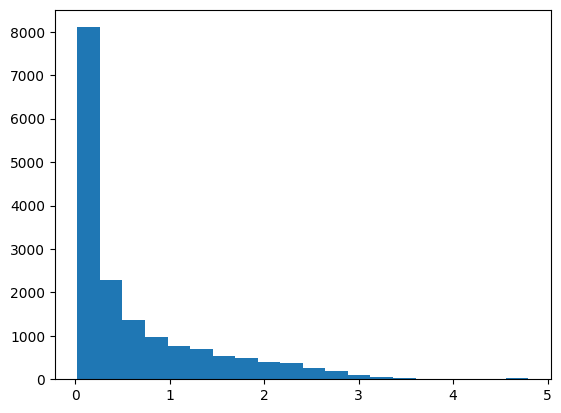

In [142]:
data["RNA-SEQ"] = m.filter_data(data["RNA-SEQ"], False, dropgenes=None, droplowcvs=0.1)
data["RNA-SEQ"]


# IHC Dataset Description
- Anti-Elav (Developmental Studies Hybridoma Bank, Catalog # 7E8A10):
> This is a rat monoclonal antibody against the Elav (embryonic lethal abnormal vision) protein in Drosophila. Elav is a marker for most differentiated neuronal cells in the central and peripheral nervous system. It's used to identify neurons at all stages of development once they have differentiated. This antibody is particularly useful for studying neuronal development and differentiation in the central nervous system.
- Anti-Cc3 (Cell Signaling Technology, Catalog # 9661):
> While not directly mentioned in the search results, this antibody typically targets cleaved caspase-3 (Cc3), which is an indicator of apoptosis. In the context of the central nervous system, it can be used to study programmed cell death in neurons and other neural cells during development or in pathological conditions.
- Anti-8-oxo-dG (R&D Systems, Catalog # 4354-MC050):
> This antibody targets 8-oxo-2'-deoxyguanosine (8-oxo-dG), a marker of oxidative DNA damage. In the central nervous system, it can be used to study oxidative stress in neurons and glial cells, which is relevant in various neurodegenerative diseases and aging processes.
- Anti-Repo (Developmental Studies Hybridoma Bank, Catalog # 8D12):
> This antibody targets the Repo (Reversed polarity) protein, which is a marker for glial cells. It's often used in contrast with Elav staining to distinguish between neurons and glial cells in the central nervous system. This antibody is valuable for studying glial cell development and function in the nervous system.
- Anti-TH (EMD Millipore, Catalog # AB152):
> This antibody targets tyrosine hydroxylase (TH), the rate-limiting enzyme in the synthesis of catecholamines. In the central nervous system, it's used to identify dopaminergic and noradrenergic neurons. This antibody is particularly useful for studying disorders involving these neurotransmitter systems, such as Parkinson's disease.


In [143]:
data["IHC"].head()

,source_name,th_positive_cells,repo_glial_cells
0,Earth_F1,101.0,429.714286
1,Earth_F2,103.0,401.000000
2,Earth_F3,86.0,351.000000
3,Earth_F4,101.0,515.000000
4,Earth_F5,98.0,429.714286


In [144]:
data["IHC"].columns

Index(['source_name', 'th_positive_cells', 'repo_glial_cells'], dtype='object')

# Dataset for ML 
- Aligned RNA-SEQ & IHC Data
- Drop genes with low counts, genes that don't code for a protein

In [145]:
pd.set_option('display.max_columns', 10)

# set columns to genes
df = data["RNA-SEQ"].copy().T
df.columns = df.iloc[0]
df = df.iloc[1:]
df.reset_index(inplace=True)
df.rename(columns={'index': 'source_name'}, inplace=True)
df.rename_axis("", axis=1, inplace=True)

source_names = df['source_name']

# filter data["IHC"] based on the source_names list
filtered_IHC = data["IHC"][data["IHC"]['source_name'].isin(source_names)]
filtered_IHC.set_index('source_name', inplace=True)
df.set_index('source_name', inplace=True)
filtered_IHC = filtered_IHC.reindex(df.index)
filtered_IHC.reset_index(inplace=True)


# add IHC values to df
df = df.join(filtered_IHC.set_index('source_name'), on='source_name').copy()
df.reset_index(inplace=True)

# Import the MyGeneInfo module
mg = m.mygene.MyGeneInfo()

# Get the list of FlyBase gene IDs from the columns of the dataframe
flybase_ids = df.columns.tolist()
flybase_ids.remove('source_name')
flybase_ids.remove('repo_glial_cells')
flybase_ids.remove('th_positive_cells')

# Query MyGeneInfo for FlyBase IDs
ginfo = mg.querymany(flybase_ids, scopes='flybase')

# Initialize lists to keep track of genes to drop and those with symbols
drop_list = []
hit_list = []

# Create a dictionary to map FlyBase IDs to gene symbols
id_to_symbol = {}

# Iterate through the query results
for g in ginfo:
    # Check if the gene has a 'symbol'; if not, add to the drop list
    if 'symbol' not in g:
        drop_list.append(g['query'])
    else:
        # If the gene symbol is not in the hit list, map the FlyBase ID to its symbol
        if g['symbol'] not in hit_list:
            id_to_symbol[g['query']] = g['symbol']
            hit_list.append(g['symbol'])

# Print the shape of the RNA-seq data before filtering
print('RNA-seq data shape before: ', df.shape)

# Rename the FlyBase ID columns to gene symbols
df.rename(columns=id_to_symbol, inplace=True)

# Remove columns where the gene ID did not have a corresponding symbol
df.drop(columns=drop_list, inplace=True)

# Print the shape of the RNA-seq data after filtering
print('RNA-seq data shape after: ', df.shape)

df.to_csv("filtered_data.csv")
df

2028 input query terms found no hit:	['FBgn0001981', 'FBgn0003888', 'FBgn0004364', 'FBgn0010812', 'FBgn0019643', 'FBgn0025683', 'FBgn0025


RNA-seq data shape before:  (24, 14275)
RNA-seq data shape after:  (24, 12247)


,source_name,7SLRNA:CR32864,abd-A,Abd-B,Abl,...,lncRNA:CR46489,lncRNA:CR46490,dbf,th_positive_cells,repo_glial_cells
0,Earth_M1,268.32694,3.721252,0.0,5792.651152,...,54.46141,0.0,10.173089,85.000000,456.000000
1,Earth_M2,289.610821,6.748211,1.572493,6025.273956,...,54.126543,0.0,3.554468,75.000000,332.000000
2,Earth_M3,307.904018,6.457626,9.666983,5669.638583,...,68.002846,0.0,15.739374,95.000000,424.000000
3,Earth_M4,767.736468,0.0,1.898347,5646.796932,...,69.459117,1.475018,0.0,90.000000,368.000000
4,Earth_F1,363.014096,0.810243,14.056209,4716.378972,...,79.717277,4.788007,0.0,101.000000,429.714286
5,Earth_F2,223.520592,4.260959,2.461707,4988.898115,...,60.212694,0.0,0.0,103.000000,401.000000
6,Earth_F3,237.296136,2.195389,13.225248,5071.258761,...,83.733574,0.0,5.589797,86.000000,351.000000
7,Earth_F4,434.895552,2.844821,7.404185,5147.098499,...,139.753073,0.0,0.0,101.000000,515.000000
8,SFug_M1,617.512755,4.401245,7.305775,6702.973198,...,8.945939,0.0,5.601132,80.000000,454.000000
9,SFug_M2,397.275093,6.346743,5.718576,5317.186322,...,25.781602,0.0,3.875655,70.000000,454.000000


# Augment Data
Increase sample size by using synthetic transformations

In [147]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, QuantileTransformer, RobustScaler, PowerTransformer

# Function to check and replace inf or NaN with a large number
def check_and_replace_infs(df, replacement_value=1e6):
    df.replace([np.inf, -np.inf], replacement_value, inplace=True)
    df.fillna(replacement_value, inplace=True)
    return df

# Load the gene expression data
data = pd.read_csv("data/datasets/filtered_data.csv")

# Function to apply transformations and append to dataframe
def transform_and_append(df, transformation, transformation_name, apply_to_whole_df=False):
    transformed_data = df.copy()
    
    if apply_to_whole_df:
        transformed_numeric = transformation(transformed_data.select_dtypes(include=[np.number]))
    else:
        transformed_numeric = transformed_data.select_dtypes(include=[np.number]).apply(transformation)
    
    # Cast transformed data to the same type as the original data
    for col in transformed_numeric.columns:
        transformed_numeric[col] = transformed_numeric[col].astype(transformed_data[col].dtype)
    
    transformed_numeric = check_and_replace_infs(transformed_numeric)
    
    transformed_data.update(transformed_numeric)
    transformed_data['source_name'] = transformed_data['source_name'] + f'_{transformation_name}'
    return transformed_data

# Apply log transformation
log_transformed = transform_and_append(data, np.log1p, 'log')

# Apply sqrt transformation
sqrt_transformed = transform_and_append(data, np.sqrt, 'sqrt')

# Apply Box-Cox transformation
def boxcox_transform(x):
    x_positive = x + 1 - np.min(x)
    transformed, _ = boxcox(x_positive)
    return transformed

boxcox_transformed = transform_and_append(data, boxcox_transform, 'boxcox')

# Apply Centered Log Ratio (CLR) transformation
def clr_transform(x):
    gm = np.exp(np.mean(np.log(x + 1)))  # Adding 1 to avoid log(0)
    return np.log((x + 1) / gm)  # Adding 1 to avoid log(0)

clr_transformed = transform_and_append(data, clr_transform, 'clr')

# Median of Ratios (DESeq2) transformation approximation
def deseq2_transform(df):
    transformed_data = df.copy()
    counts = transformed_data.select_dtypes(include=[np.number])
    geometric_means = np.exp(np.mean(np.log(counts + 1), axis=0))  # Add 1 to avoid log(0)
    size_factors = counts.divide(geometric_means, axis=1).median(axis=0)
    normalized_counts = counts.divide(size_factors, axis=1)
    
    # Cast normalized counts to the same type as the original data
    for col in normalized_counts.columns:
        normalized_counts[col] = normalized_counts[col].astype(transformed_data[col].dtype)
    
    normalized_counts = check_and_replace_infs(normalized_counts)
    
    transformed_data.update(normalized_counts)
    return transformed_data

deseq2_transformed = deseq2_transform(data)
deseq2_transformed['source_name'] = data['source_name'] + '_deseq2'

# Apply Z-Score Normalization
def zscore_transform(x):
    return (x - np.mean(x)) / np.std(x)

zscore_transformed = transform_and_append(data, zscore_transform, 'zscore')

# Apply Quantile Transformation
def quantile_transform(df):
    qt = QuantileTransformer(output_distribution='normal', random_state=0)
    transformed = qt.fit_transform(df.select_dtypes(include=[np.number]))
    transformed_df = pd.DataFrame(transformed, columns=df.select_dtypes(include=[np.number]).columns)
    transformed_df = check_and_replace_infs(transformed_df)
    return transformed_df

quantile_transformed = transform_and_append(data, quantile_transform, 'quantile', apply_to_whole_df=True)

# Apply Min-Max Scaling
def minmax_transform(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

minmax_transformed = transform_and_append(data, minmax_transform, 'minmax')

# Apply Robust Scaling
def robust_transform(df):
    rs = RobustScaler()
    transformed = rs.fit_transform(df.select_dtypes(include=[np.number]))
    transformed_df = pd.DataFrame(transformed, columns=df.select_dtypes(include=[np.number]).columns)
    transformed_df = check_and_replace_infs(transformed_df)
    return transformed_df

robust_transformed = transform_and_append(data, robust_transform, 'robust', apply_to_whole_df=True)

# Apply Yeo-Johnson Transformation
def yeo_johnson_transform(df):
    pt = PowerTransformer(method='yeo-johnson')
    transformed = pt.fit_transform(df.select_dtypes(include=[np.number]))
    transformed_df = pd.DataFrame(transformed, columns=df.select_dtypes(include=[np.number]).columns)
    transformed_df = check_and_replace_infs(transformed_df)
    return transformed_df

yeo_johnson_transformed = transform_and_append(data, yeo_johnson_transform, 'yeojohnson', apply_to_whole_df=True)

# Combine all transformed data
transformed_data = pd.concat([
    data,
    log_transformed,
    sqrt_transformed,
    boxcox_transformed,
    clr_transformed,
    deseq2_transformed,
    zscore_transformed,
    quantile_transformed,
    minmax_transformed,
    robust_transformed,
    yeo_johnson_transformed
], axis=0)

# Save the transformed data
output_file_path = 'data/datasets/augmented_gene_expression_data.csv'
transformed_data.to_csv(output_file_path, index=False)

output_file_path

'data/datasets/augmented_gene_expression_data.csv'

In [ ]:
transformed_data["source_name"]


0               Earth_M1
1               Earth_M2
2               Earth_M3
3               Earth_M4
4               Earth_F1
             ...        
19    SF1g_M4_yeojohnson
20    SF1g_F1_yeojohnson
21    SF1g_F2_yeojohnson
22    SF1g_F3_yeojohnson
23    SF1g_F4_yeojohnson
Name: source_name, Length: 264, dtype: object

In [ ]:
transformed_data.head(transformed_data.size)

,Unnamed: 0,source_name,FBgn0000003,FBgn0000008,FBgn0000014,FBgn0000015,FBgn0000017,FBgn0000018,FBgn0000024,FBgn0000028,...,RR50960_transposable_element,RR51000_transposable_element,RR51001_transposable_element,RR51007_transposable_element,RR51048_transposable_element,RR51093_transposable_element,RR51475_transposable_element,RR51477_transposable_element,th_positive_cells,repo_glial_cells
0,0,Earth_M1,268.326940,1211.805611,3.721252,0.000000,5792.651152,200.221130,11287.761373,425.051856,...,1.853088,12.979478,12.979454,509.601736,0.000000,241.838826,219.591935,13.899158,85.000000,456.000000
1,1,Earth_M2,289.610821,1163.875378,6.748211,1.572493,6025.273956,231.513901,11197.471977,406.363064,...,0.889887,3.561205,16.025401,666.527630,0.000000,137.937182,189.546519,16.018844,75.000000,332.000000
2,2,Earth_M3,307.904018,1055.794866,6.457626,9.666983,5669.638583,234.751418,10560.234965,397.471821,...,0.000000,10.753581,21.507185,526.283078,4.138006,0.000000,256.521685,7.447111,95.000000,424.000000
3,3,Earth_M4,767.736468,1091.560477,0.000000,1.898347,5646.796932,246.590799,10436.129453,465.545397,...,2.904658,8.704375,26.113213,599.806296,0.000000,47.196831,307.164944,10.164972,90.000000,368.000000
4,4,Earth_F1,363.014096,1066.283531,0.810243,14.056209,4716.378972,260.211554,8114.340210,419.436546,...,2.888119,9.630708,25.039813,1756.944820,0.000000,56.801274,331.171984,4.813748,101.000000,429.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,1,SF1g_M4_yeojohnson,1.231450,-0.497490,0.360305,-0.219497,0.677869,-1.320275,0.979000,0.088062,...,0.990986,0.139432,0.704564,-1.214719,1.910661,-0.962895,-1.606859,-0.394532,0.916296,2.014728
20,1,SF1g_F1_yeojohnson,-1.062196,1.214520,1.116586,0.298754,-0.004557,0.035370,0.409837,0.743197,...,-1.035695,-0.322614,1.042713,-0.185885,-0.575965,0.291744,-0.189956,0.747517,0.700023,0.162612
21,1,SF1g_F2_yeojohnson,-0.276799,1.232732,-1.308876,-0.714693,0.627077,0.524918,-0.072758,1.206127,...,-1.035695,-0.703674,1.188136,-0.280050,-0.575965,1.103789,-0.851050,-0.719247,0.345061,0.693842
22,1,SF1g_F3_yeojohnson,-0.454815,-0.035528,-0.508719,1.489107,-0.697233,0.853178,-1.090687,0.353854,...,-1.035695,-0.032030,-0.132888,1.096798,-0.575965,0.526301,0.277194,-0.064513,1.878773,-0.343993
